# Further Analysis and Plotting of the Pessoa Corpus:

### Introduction:

This is a continuation of the analysis presented in the other Jupyter Notebook from this repository. The same processing of the documents is performed here, along with some basic analysis and plotting of some of the textual features in the three works present in the corpus. In order to obtain more accurate results one can replace spaCy's simple English Language model that is used in this code with the more advanced English models available from spaCy. For demonstration purposes and congruence with the previous Notebook the same language model was used here.

In [ ]:
# Import spacy
import spacy

# Install English language model
!spacy download en_core_web_sm

# Import os to upload documents and metadata
import os

# Load spaCy visualizer
from spacy import displacy

# Import pandas DataFrame packages
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Import graphing package
import plotly.express as px

# Import re (regular expressions package)
import re

In [4]:
# Create empty lists for file names and contents
texts = []
file_names = []

# Iterate through each file in the folder
for _file_name in os.listdir('data'):
# Look for only text files
    if _file_name.endswith('.txt'):
    # Append contents of each text file to text list
        texts.append(open('data' + '/' + _file_name, 'r', encoding='utf-8').read())
        # Append name of each file to file name list
        file_names.append(_file_name)

In [5]:
# Create dictionary object associating each file name with its text
d = {'Filename':file_names,'Document':texts}

In [6]:
# Import simple_cleaner module from gutenberg-cleaner
from gutenberg_cleaner import simple_cleaner

In [7]:
# Turn dictionary into a dataframe
text_df = pd.DataFrame(d)

In [8]:
text_df.head()

,Filename,Document
0,19978.txt,﻿The Project Gutenberg eBook of 35 Sonnets\n ...
1,66039.txt,"﻿The Project Gutenberg eBook of English Poems,..."
2,66040.txt,"﻿The Project Gutenberg eBook of English Poems,..."


In [9]:
text_df['Raw_text'] = text_df['Document'].apply(simple_cleaner)

In [10]:
# Remove unwanted characters from the text using re

# Define the function clean_text
def clean_text(text):
    # substitute new line \n, carriage return \r and tab \t characters with whitespace and return the cleaned text
    return re.sub(r'[\r\n\t]+', ' ', text).strip()

# Apply the function to the Dataframe column containing our texts
text_df['Raw_text'] = text_df['Raw_text'].apply(clean_text)

# Remove .txt from title of each paper
text_df['Filename'] = text_df['Filename'].str.replace('.txt', '', regex=True)

In [11]:
# Load the Gutenberg metadata csv
metadata_df = pd.read_csv('data/pg_catalog.csv')

# List of Gutenberg IDs for the chosen books
chosen_book_ids = [19978, 66039, 66040]  # Extract only the metadata for the three texts by Pessoa in our corpus

# Filter the DataFrame to include only rows with these IDs
filtered_metadata = metadata_df[metadata_df['Text#'].isin(chosen_book_ids)]

In [12]:
# Assign the created pessoa_metadata.csv to the metadata dataframe
metadata_df = pd.read_csv('pessoa_gutenberg_metadata.csv')

In [13]:
# Rename column from Title to Filename in order to merge the two tables
metadata_df.rename(columns={"Text#": "Filename"}, inplace=True)

In [14]:
# Convert the data type of the Filename column into strings to allow the merging of the metadata and text tables in the next step
metadata_df['Filename'] = metadata_df['Filename'].astype(str)

In [15]:
# Merge the files to their metadata in a new DataFrame
pessoa_df = metadata_df.merge(text_df,on='Filename')
pessoa_df.head()

,Filename,Type,Issued,Title,Language,Authors,Subjects,LoCC,Bookshelves,Document,Raw_text
0,19978,Text,2006-11-30,35 Sonnets,en,"Pessoa, Fernando, 1888-1935",Poetry,PQ,Browsing: Literature; Browsing: Poetry,﻿The Project Gutenberg eBook of 35 Sonnets\n ...,35 Sonnets by Fernando Pessoa I. Whether we wr...
1,66039,Text,2021-08-11,"English Poems, Volume 01 (of 2)",en,"Pessoa, Fernando, 1888-1935",Poetry,PQ,Browsing: Literature; Browsing: Poetry,"﻿The Project Gutenberg eBook of English Poems,...",ENGLISH POEMS BY FERNANDO PESSOA I.--ANTINOUS ...
2,66040,Text,2021-08-11,"English Poems, Volume 02 (of 2)",en,"Pessoa, Fernando, 1888-1935",Poetry,PQ,Browsing: Literature; Browsing: Poetry,"﻿The Project Gutenberg eBook of English Poems,...",ENGLISH POEMS BY FERNANDO PESSOA III EPITHALAM...


In [16]:
# Load nlp pipeline
nlp = spacy.load('en_core_web_sm')

# Check what functions it performs
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [17]:
# Define a function that runs the nlp pipeline on any given input text
def process_text(text):
    return nlp(text)

In [18]:
# Apply the function to the "Raw_text" column, so that the nlp pipeline is called on each of the three Pessoa works in our corpus
pessoa_df['Doc'] = pessoa_df['Raw_text'].apply(process_text)
pessoa_df.head()

,Filename,Type,Issued,Title,Language,Authors,Subjects,LoCC,Bookshelves,Document,Raw_text,Doc
0,19978,Text,2006-11-30,35 Sonnets,en,"Pessoa, Fernando, 1888-1935",Poetry,PQ,Browsing: Literature; Browsing: Poetry,﻿The Project Gutenberg eBook of 35 Sonnets\n ...,35 Sonnets by Fernando Pessoa I. Whether we wr...,"(35, Sonnets, by, Fernando, Pessoa, I., Whethe..."
1,66039,Text,2021-08-11,"English Poems, Volume 01 (of 2)",en,"Pessoa, Fernando, 1888-1935",Poetry,PQ,Browsing: Literature; Browsing: Poetry,"﻿The Project Gutenberg eBook of English Poems,...",ENGLISH POEMS BY FERNANDO PESSOA I.--ANTINOUS ...,"(ENGLISH, POEMS, BY, FERNANDO, PESSOA, I.--ANT..."
2,66040,Text,2021-08-11,"English Poems, Volume 02 (of 2)",en,"Pessoa, Fernando, 1888-1935",Poetry,PQ,Browsing: Literature; Browsing: Poetry,"﻿The Project Gutenberg eBook of English Poems,...",ENGLISH POEMS BY FERNANDO PESSOA III EPITHALAM...,"(ENGLISH, POEMS, BY, FERNANDO, PESSOA, III, EP..."


In [19]:
# Define a function to retrieve tokens from a doc object
def get_token(doc):
    return [(token.text) for token in doc]

In [20]:
# Run the token retrieval function on the doc objects in the dataframe
pessoa_df['Tokens'] = pessoa_df['Doc'].apply(get_token)

In [21]:
# Define a function to retrieve lemmas from a doc object
def get_lemma(doc):
    return [(token.lemma_) for token in doc]

# Run the lemma retrieval function on the doc objects in the dataframe
pessoa_df['Lemmas'] = pessoa_df['Doc'].apply(get_lemma)

In [22]:
# Define a function to retrieve part-of-speech from a doc object
def get_pos(doc):
    #Return the coarse- and fine-grained part of speech text for each token in the doc
    return [(token.pos_, token.tag_) for token in doc]

# Define a function to retrieve parts of speech from a doc object
pessoa_df['POS'] = pessoa_df['Doc'].apply(get_pos)

In [23]:
# Define function to extract proper nouns from Doc object
def extract_proper_nouns(doc):
    return [token.text for token in doc if token.pos_ == 'PROPN']

# Apply function to Doc column and store resulting proper nouns in new column
pessoa_df['Proper_Nouns'] = pessoa_df['Doc'].apply(extract_proper_nouns)
pessoa_df.head()

,Filename,Type,Issued,Title,Language,Authors,Subjects,LoCC,Bookshelves,Document,Raw_text,Doc,Tokens,Lemmas,POS,Proper_Nouns
0,19978,Text,2006-11-30,35 Sonnets,en,"Pessoa, Fernando, 1888-1935",Poetry,PQ,Browsing: Literature; Browsing: Poetry,﻿The Project Gutenberg eBook of 35 Sonnets\n ...,35 Sonnets by Fernando Pessoa I. Whether we wr...,"(35, Sonnets, by, Fernando, Pessoa, I., Whethe...","[35, Sonnets, by, Fernando, Pessoa, I., Whethe...","[35, Sonnets, by, Fernando, Pessoa, I., whethe...","[(NUM, CD), (PROPN, NNPS), (ADP, IN), (PROPN, ...","[Sonnets, Fernando, Pessoa, I., Joy, Haply, Tr..."
1,66039,Text,2021-08-11,"English Poems, Volume 01 (of 2)",en,"Pessoa, Fernando, 1888-1935",Poetry,PQ,Browsing: Literature; Browsing: Poetry,"﻿The Project Gutenberg eBook of English Poems,...",ENGLISH POEMS BY FERNANDO PESSOA I.--ANTINOUS ...,"(ENGLISH, POEMS, BY, FERNANDO, PESSOA, I.--ANT...","[ENGLISH, POEMS, BY, FERNANDO, PESSOA, I.--ANT...","[ENGLISH, poems, by, FERNANDO, PESSOA, I.--ANT...","[(PROPN, NNP), (NOUN, NN), (NOUN, NN), (PROPN,...","[ENGLISH, FERNANDO, PESSOA, APARTADO, _, Antin..."
2,66040,Text,2021-08-11,"English Poems, Volume 02 (of 2)",en,"Pessoa, Fernando, 1888-1935",Poetry,PQ,Browsing: Literature; Browsing: Poetry,"﻿The Project Gutenberg eBook of English Poems,...",ENGLISH POEMS BY FERNANDO PESSOA III EPITHALAM...,"(ENGLISH, POEMS, BY, FERNANDO, PESSOA, III, EP...","[ENGLISH, POEMS, BY, FERNANDO, PESSOA, III, EP...","[ENGLISH, poems, by, FERNANDO, PESSOA, III, EP...","[(PROPN, NNP), (NOUN, NN), (NOUN, NN), (PROPN,...","[ENGLISH, FERNANDO, PESSOA, III, EPITHALAMIUM,..."


### Data exploration and visualization:

From here onwards we will be using the Named Entity Recognition pipeline in spaCy and explore how accurately it can detect and label features in our texts. The list of available labels that spaCy operates with will be displayed below. Additionally, we will use spaCy to detect and count the parts-of-speech found in each text and plot some graphs to visualize this data. Lastly, we will critically reflect on spaCy's possibilities to work with poems, which rely heavily on abstract language and metaphors, specifically in the pursuit of labeling and annotating textual features. 

Before beginning, it is noteworthy to reiterate that this Notebook operates with spaCy's simple English language model to stay congruent with the original Notebook in this repository. Thus, any possible assertion about encountered limitations will pertain to our use of this specific language model. Other, more advanced language models, might disprove a lot of the claims made here.

In [24]:
# Get all NE labels and assign to variable
labels = nlp.get_pipe("ner").labels

# Print each label and its description
for label in labels:
    print(label + ' : ' + spacy.explain(label))

CARDINAL : Numerals that do not fall under another type
DATE : Absolute or relative dates or periods
EVENT : Named hurricanes, battles, wars, sports events, etc.
FAC : Buildings, airports, highways, bridges, etc.
GPE : Countries, cities, states
LANGUAGE : Any named language
LAW : Named documents made into laws.
LOC : Non-GPE locations, mountain ranges, bodies of water
MONEY : Monetary values, including unit
NORP : Nationalities or religious or political groups
ORDINAL : "first", "second", etc.
ORG : Companies, agencies, institutions, etc.
PERCENT : Percentage, including "%"
PERSON : People, including fictional
PRODUCT : Objects, vehicles, foods, etc. (not services)
QUANTITY : Measurements, as of weight or distance
TIME : Times smaller than a day
WORK_OF_ART : Titles of books, songs, etc.


In [25]:
# Define function to extract named entities from doc objects
def extract_named_entities(doc):
    return [ent.label_ for ent in doc.ents]

# Apply function to Doc column and store resulting named entities in new column
pessoa_df['Named_Entities'] = pessoa_df['Doc'].apply(extract_named_entities)
pessoa_df['Named_Entities']

0    [CARDINAL, PERSON, PERSON, ORG, PERSON, ORG, D...
1    [DATE, DATE, PERSON, ORG, ORG, PERSON, DATE, P...
2    [PRODUCT, DATE, PERSON, PERSON, TIME, DATE, CA...
Name: Named_Entities, dtype: object

In [26]:
# Define function to extract text tagged with named entities from doc objects
def extract_named_entities(doc):
    return [ent for ent in doc.ents]

# Apply function to Doc column and store resulting text in new column
pessoa_df['NE_Words'] = pessoa_df['Doc'].apply(extract_named_entities)
pessoa_df['NE_Words']

0    [(35), (Fernando, Pessoa, I.), (Joy), (Haply, ...
1    [(145, 1921), (1918), (INDEX, I.--ANTINOUS), (...
2    [(145, 1921), (this, day), (Tis), (Risen), (la...
Name: NE_Words, dtype: object

In [27]:
# Extract the first Doc object
doc = pessoa_df['Doc'][0]

# Visualize named entity tagging in the '35 Sonnets' text by Pessoa
displacy.render(doc, style='ent', jupyter=True)

 This visualization already provides some indication into spaCy's labeling possibilities. As one can see, even this simple language model can detect cardinals quite accurately. It is also quite efficient in detecting various relative date components, such as 'day', 'night', 'each day', 'next day' etc. What it struggles with identifying correctly are features such as works of art, persons, organizations and others. One potential cause is the formatting of the texts, since all the lines in our poems start with a capital letter, which might confuse the algorithm. Another, more probable cause, is the simple language model used, which might have been trained on a reduced set of named entities. Next, we will look spaCy performs on parts-of-speech recognition. Lastly, it should not be ignored, as mentioned earlier, that we are working with poems that use language in a different, often metaphorical, way. The results would probably be different were we to explore a scientific texts that uses words more literally.


In [37]:
# Create new DataFrame for analysis purposes
pos_analysis_df = pessoa_df[['Filename','Title', 'Doc']]

# Create list to store each dictionary
num_list = []

# Define a function to get part of speech tags and counts and append them to a new dictionary
def get_pos_tags(doc):
    dictionary = {}
    num_pos = doc.count_by(spacy.attrs.POS)
    for k,v in sorted(num_pos.items()):
        dictionary[doc.vocab[k].text] = v
    num_list.append(dictionary)

# Apply function to each doc object in DataFrame
pos_analysis_df.loc['C_POS'] = pos_analysis_df['Doc'].apply(get_pos_tags)

In [36]:
# Create new dataframe with part of speech counts
pos_counts = pd.DataFrame(num_list)
columns = list(pos_counts.columns)

# Add each text as new column to dataframe
idx = 0
new_col = pos_analysis_df['Title']
pos_counts.insert(loc=idx, column='Title', value=new_col)

pos_counts

,Title,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,VERB,X,SPACE
0,35 Sonnets,342,449,161,235,196,347,4,906,9,179,490,130,635,137,576,3.0,70.0
1,"English Poems, Volume 01 (of 2)",283,354,200,195,157,288,16,839,20,123,430,122,539,73,455,NaN,NaN
2,"English Poems, Volume 02 (of 2)",233,308,136,95,143,303,4,719,10,104,273,81,378,79,412,1.0,NaN


After obtaining the counts for each part-of-speech tag it would be sensible to verify if the labeling is accurate given the limited language model we are working with.  

In [42]:
# Write a function to get token-level details for verifying the labels
def extract_pos_tokens(doc):
    # Create a DataFrame for each token with its POS details
    data = [{'Token': token.text,  
             'POS': token.pos_,
             'Explanation': spacy.explain(token.pos_)} for token in doc]
    return pd.DataFrame(data)

# Test example: Inspect POS tagging for the '35 Sonnets' by Fernando Pessoa
doc_to_validate = pos_analysis_df['Doc'].iloc[0] 
pos_token_df = extract_pos_tokens(doc_to_validate)
# Display the first 40 words
pos_token_df.head(40)

,Token,POS,Explanation
0,35,NUM,numeral
1,Sonnets,PROPN,proper noun
2,by,ADP,adposition
3,Fernando,PROPN,proper noun
4,Pessoa,PROPN,proper noun
5,I.,PROPN,proper noun
6,Whether,SCONJ,subordinating conjunction
7,we,PRON,pronoun
8,write,VERB,verb
9,or,CCONJ,coordinating conjunction


As we can see, the labeling is correct indicating that even the simple English language model is capable to perform this task well. Lastly, let's plot a graph to visualize the distribution of three categories of POS, namely adjectives, verbs and punctuation. 

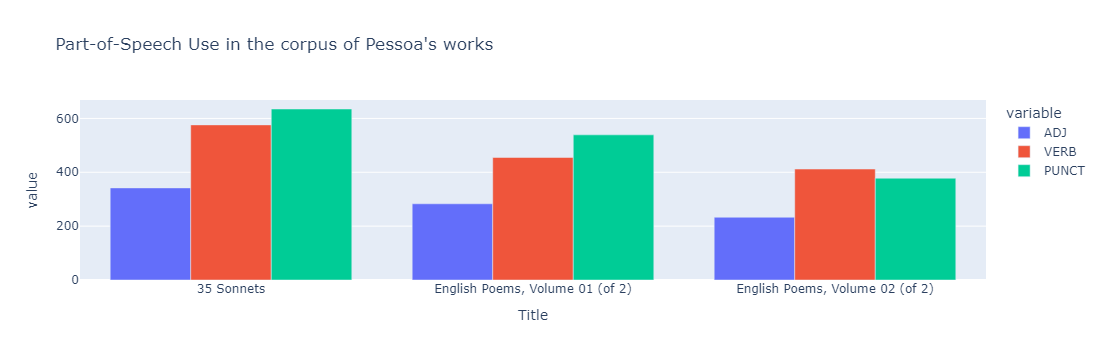

In [43]:
# Use plotly to plot part-of-speech use per text
fig = px.bar(pos_counts, x="Title", y=["ADJ", 'VERB', "PUNCT"], title="Part-of-Speech Use in the corpus of Pessoa's works", barmode='group')
fig.show()

### Conclusion: 

This marks the end of this Notebook. In it, we explored various ways of performing data exploration and tagging using spaCy. As presented above, due to the limited language model that was used for this exercise, we encountered some errors, specifically in the model's capacity to determine Named Entities in our corpus. On the other hand, it performed well in labeling each token to its corresponding part-of-speech tag, making it reliable for digital humanists who would like to investigate the uses of various POS in Pessoa's texts. It remains imperative to experiment with more advanced language models available in spaCy to assert a more nuanced opinion about its labeling capacities.